In [1]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as pyplot
from matplotlib.colors import ListedColormap
from sklearn import metrics

Код по визуализации границы взял с репозитория https://github.com/ml-mipt/, немного изменив для своих нужд.

In [10]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(estimator, train_data, train_labels,
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)

    #set figure size
    pyplot.figure(figsize = (16, 6))

    #plot decision surface on the train data
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)


In [7]:
%matplotlib inline

Далее нужно просто обучить классификатор и с помощью функции gridSearch найти оптимальный параметр k.

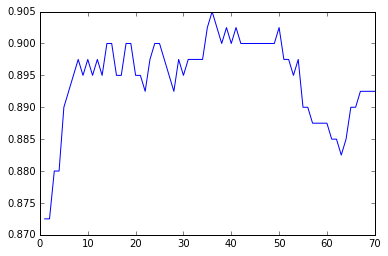

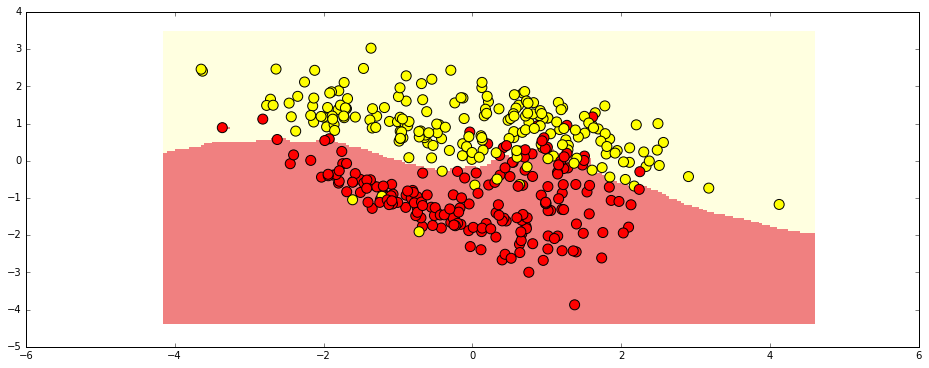

In [21]:
X, y = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0, n_classes=2)
knn = KNeighborsClassifier(metric='euclidean', weights='distance')
params = {'n_neighbors': np.linspace(1, 70, 70)}
gs = GridSearchCV(knn, params, scoring='accuracy', cv=5)
gs.fit(X, y)
pyplot.plot(gs.cv_results_['param_n_neighbors'].data, gs.cv_results_['mean_test_score'])
plot_decision_surface(gs.best_estimator_, X, y)

In [22]:
print gs.best_score_
print gs.best_estimator_

0.905
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=36.0, p=2,
           weights='distance')
